# Differently sized subplots
In this example we will be working with a dataset having two related but significantly different scales. Plotting them together makes a lot of sence, but what if you want one of the plots to get more emphasis than the other?

Here is how to do that

In [29]:
# Standard import statments
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Dataset
Here is the dataset we will be using for the example:

In [10]:
df=DataFrame({
'A': {0.0: -62.6, 16.0: -70.9, 22.6: -63.4, 32.0: -67.1, 35.8: -68.9, 45.3: -73.9, 48.0: -62.7, 50.6: -72.8, 67.9: -71.3},
'B': {0.0: 7.8, 16.0: 8.1, 22.6: 7.3, 32.0: 5.9, 35.8: 7.8, 45.3: 7.1, 48.0: 9.6, 50.6: 3.9, 67.9: 9.5}})

In [11]:
df

,A,B
0.0,-62.6,7.8
16.0,-70.9,8.1
22.6,-63.4,7.3
32.0,-67.1,5.9
35.8,-68.9,7.8
45.3,-73.9,7.1
48.0,-62.7,9.6
50.6,-72.8,3.9
67.9,-71.3,9.5


# Default plot
Looks like this

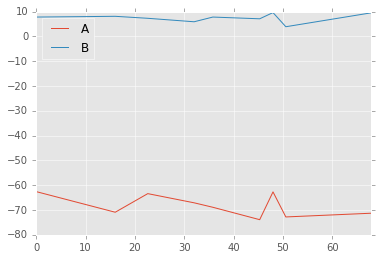

In [8]:
df.plot()

Not the best graph, but we will get the idea at least. Let us instead plot these as two separate sub plots so that pyplot can work its 'zoom to scale' magic for us. 

## Subplots
Also we should probably share the x-axis for this

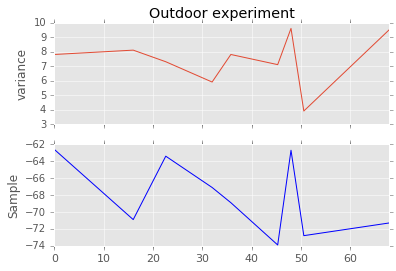

In [30]:
ax1 = plt.subplot(2,1,1)
plt.title('Outdoor experiment')
df.B.plot()
plt.ylabel('variance')
plt.setp( ax1.get_xticklabels(), visible=False)

ax2 = plt.subplot(2,1,2, sharex=ax1)
plt.ylabel('Sample')
df.A.plot(c='b')
plt.setp( ax2.get_xticklabels(), fontsize=11)
plt.show()

Looking much better, but I would like the sample chart to take more room than the variance. 

## subplot2grid
This is where `subplot2grid` comes in handy. Read about it [here](http://matplotlib.org/users/gridspec.html#gridspec-and-subplotspec)

Te arguments is a grid size tuple followed by a postion tuple and optional `colspan/rowspan` directives.

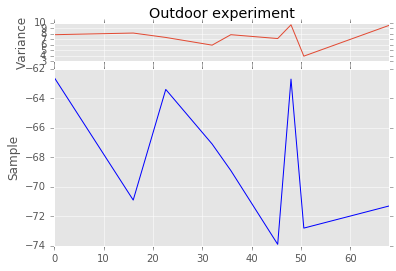

In [31]:
ax1 = plt.subplot2grid((5,1), (0, 0))
plt.title('Outdoor experiment')
df.B.plot()
plt.ylabel('Variance')
# make these tick labels invisible
plt.setp( ax1.get_xticklabels(), visible=False)

ax2 = plt.subplot2grid((5,1), (1, 0), rowspan=4, sharex=ax1)
ax2.figure
plt.ylabel('Sample')
df.A.plot(c='b')
plt.setp( ax1.get_xticklabels(), fontsize=11)
plt.show()

## Almost there
This is great, but there is not room enough to see the variance now. Final adjustment will be to scale things up a bit with a `figsize` configuration call.

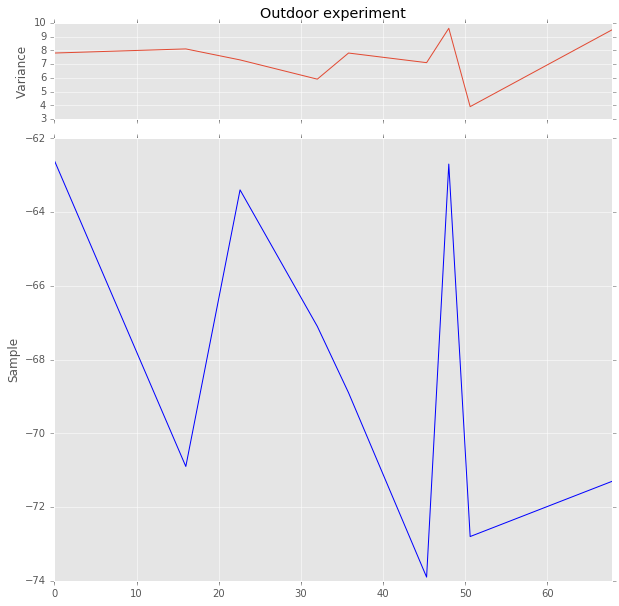

In [32]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((5,1), (0, 0))
plt.title('Outdoor experiment')
df.B.plot()
plt.ylabel('Variance')
# make these tick labels invisible
plt.setp( ax1.get_xticklabels(), visible=False)

ax2 = plt.subplot2grid((5,1), (1, 0), rowspan=4, sharex=ax1)
ax2.figure
plt.ylabel('Sample')
df.A.plot(c='b')
plt.setp( ax1.get_xticklabels(), fontsize=11)
plt.show()